<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-projecto-cad_equipo93/blob/main/Semana9_Actividad_Kmeans_equipo93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Ciencia y analítica de datos**
###Tecnológico de Monterrey
###Profesora: María de la Paz Rico Fernández

## **Actividad de la Semana 9**
###**Limpieza, análisis, visualización y kmeans**


**Nombres y matrículas de los integrantes del equipo:**


   **Equipo 93**

*   Omar Nayib García Sabag - A01793008
*   Marco Antonio Vázquez Morales (A01793704)

In [ ]:
!pip install geopandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import requests, zipfile
import geopandas as gpd
from shapely.geometry import Point
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
# activate plot theme
! pip install qeds
import qeds
qeds.themes.mpl_style();

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Limpieza de datos**

In [ ]:
 !wget = 'http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip'

--2022-11-18 05:14:14--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2022-11-18 05:14:14--  http://201.116.60.46/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
Connecting to 201.116.60.46:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2556825 (2.4M) [application/x-zip-compressed]
Saving to: ‘Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip’

Datos_de_calidad_de 100%[===================>]   2.44M  1.49MB/s    in 1.6s    

2022-11-18 05:14:16 (1.49 MB/s) - ‘Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip’ saved [2556825/2556825]

FINISHED --2022-11-18 05:14:16--
Total wall clock time: 1.8s
Downloaded: 1 files, 2.4M in 1.6s (1.49 MB/s)


In [ ]:
!unzip /content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip

Archive:  /content/Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip
  inflating: Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv  
  inflating: Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.kmz  
  inflating: Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.csv  
  inflating: Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_superficiales_2020.kmz  
  inflating: Datos_de_calidad_del_agua_2020/Escalas_subterranea.csv  
  inflating: Datos_de_calidad_del_agua_2020/Escalas_superficial.csv  


In [ ]:
!ls

Datos_de_calidad_del_agua_2020				   sample_data
Datos_de_calidad_del_agua_de_5000_sitios_de_monitoreo.zip


In [ ]:
df = pd.read_csv("Datos_de_calidad_del_agua_2020/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv",  encoding = 'latin1')  

In [ ]:
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
df.isna().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

In [ ]:
df = df.drop(['CONTAMINANTES', 'SDT_mg/L', 'PERIODO'], axis=1)
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


In [ ]:
df["CALIDAD_CONDUC"].value_counts(sort=False)

Permisible para riego    460
Buena para riego         434
Dudosa para riego         72
Indeseable para riego     51
Excelente para riego      45
Name: CALIDAD_CONDUC, dtype: int64

In [ ]:
# Imputamos la variable CALIDAD_CONDUC con la moda
df['CALIDAD_CONDUC'].fillna(df['CALIDAD_CONDUC'].mode(), inplace=True)
print("Valores perdidos en CALIDAD_CONDUC: " + 
      str(df['CALIDAD_CONDUC'].isnull().sum()))

Valores perdidos en CALIDAD_CONDUC: 6


In [ ]:
df["CONDUCT_mS/cm"].value_counts(sort=False)

940.0     2
608.0     3
532.0     1
686.0     1
1841.0    1
         ..
1622.0    1
2350.0    1
529.0     1
2600.0    1
817.0     1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64

In [ ]:
df["ALC_mg/L"].value_counts(sort=False)

229.990    1
231.990    1
204.920    2
327.000    1
309.885    1
          ..
284.700    1
374.490    1
410.625    1
231.045    1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64

In [ ]:
df["CALIDAD_ALC"].value_counts(sort=False)

Alta                    794
Media                   187
Baja                     24
Indeseable como FAAP     59
Name: CALIDAD_ALC, dtype: int64

In [ ]:
# Imputamos la variable CALIDAD_ALC con la moda
df['CALIDAD_ALC'].fillna(df['CALIDAD_ALC'].mode(), inplace=True)
print("Valores perdidos en CALIDAD_ALC: " + 
      str(df['CALIDAD_ALC'].isnull().sum()))

Valores perdidos en CALIDAD_ALC: 4


In [ ]:
df["CALIDAD_SDT_ra"].value_counts(sort=False)

Cultivos sensibles              343
Excelente para riego            491
Cultivos con manejo especial    161
Cultivos tolerantes              64
Indeseable para riego             7
Name: CALIDAD_SDT_ra, dtype: int64

In [ ]:
# Imputamos la variable CALIDAD_SDT_ra con la moda
df['CALIDAD_SDT_ra'].fillna(df['CALIDAD_SDT_ra'].mode("Excelente para riego"), inplace=True)
print("Valores perdidos en CALIDAD_SDT_ra: " + 
      str(df['CALIDAD_SDT_ra'].isnull().sum()))


Valores perdidos en CALIDAD_SDT_ra: 2


##**Exploración de los datos**

In [ ]:
df = df.dropna().reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 54 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1054 non-null   object 
 1   SITIO                 1054 non-null   object 
 2   ORGANISMO_DE_CUENCA   1054 non-null   object 
 3   ESTADO                1054 non-null   object 
 4   MUNICIPIO             1054 non-null   object 
 5   ACUIFERO              1054 non-null   object 
 6   SUBTIPO               1054 non-null   object 
 7   LONGITUD              1054 non-null   float64
 8   LATITUD               1054 non-null   float64
 9   ALC_mg/L              1054 non-null   float64
 10  CALIDAD_ALC           1054 non-null   object 
 11  CONDUCT_mS/cm         1054 non-null   float64
 12  CALIDAD_CONDUC        1054 non-null   object 
 13  SDT_M_mg/L            1054 non-null   object 
 14  CALIDAD_SDT_ra        1054 non-null   object 
 15  CALIDAD_SDT_salin    

In [ ]:
df.describe()

,LONGITUD,LATITUD,ALC_mg/L,CONDUCT_mS/cm
count,1054.000000,1054.000000,1054.000000,1054.000000
mean,-101.848270,23.161796,234.695266,1142.726471
std,6.697568,3.875005,111.147849,1248.990617
min,-116.664250,14.561150,26.640000,110.000000
25%,-105.385170,20.224857,164.257500,506.000000
50%,-102.170665,22.640705,215.825000,820.000000
75%,-98.971268,25.508770,292.930000,1328.000000
max,-86.864120,32.677713,1650.000000,18577.000000


In [ ]:
fig = px.histogram(df, 'ALC_mg/L', marginal = 'box')
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
fig = px.histogram(df, 'CONDUCT_mS/cm', marginal = 'box')
fig.update_layout(bargap=0.2)
fig.show()

##**Análisis de la base de datos**

In [ ]:
df['SITIO_INT'] = pd.Categorical(df['SITIO']).codes
df['SUBTIPO_INT'] = pd.Categorical(df['SUBTIPO']).codes
df['CALIDAD_ALC_INT'] = pd.Categorical(df['CALIDAD_ALC']).codes
df['CALIDAD_CONDUC_INT'] = pd.Categorical(df['CALIDAD_CONDUC']).codes
df['CALIDAD_SDT_ra_INT'] = pd.Categorical(df['CALIDAD_SDT_ra']).codes
df['CALIDAD_SDT_salin_INT'] = pd.Categorical(df['CALIDAD_SDT_salin']).codes
df['CALIDAD_FLUO_INT'] = pd.Categorical(df['CALIDAD_FLUO']).codes
df['CALIDAD_DUR_INT'] = pd.Categorical(df['CALIDAD_DUR']).codes
df['CALIDAD_COLI_FEC_INT'] = pd.Categorical(df['CALIDAD_COLI_FEC']).codes
df['CALIDAD_N_NO3_FEC_INT'] = pd.Categorical(df['CALIDAD_N_NO3']).codes
df['CALIDAD_AS_INT'] = pd.Categorical(df['CALIDAD_AS']).codes
df['CALIDAD_CD_INT'] = pd.Categorical(df['CALIDAD_CD']).codes
df['CALIDAD_CR_INT'] = pd.Categorical(df['CALIDAD_CR']).codes
df['CALIDAD_HG_INT'] = pd.Categorical(df['CALIDAD_HG']).codes
df['CALIDAD_PB_INT'] = pd.Categorical(df['CALIDAD_PB']).codes
df['CALIDAD_MN_INT'] = pd.Categorical(df['CALIDAD_MN']).codes
df['CALIDAD_FE_INT'] = pd.Categorical(df['CALIDAD_FE']).codes
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CALIDAD_DUR_INT,CALIDAD_COLI_FEC_INT,CALIDAD_N_NO3_FEC_INT,CALIDAD_AS_INT,CALIDAD_CD_INT,CALIDAD_CR_INT,CALIDAD_HG_INT,CALIDAD_PB_INT,CALIDAD_MN_INT,CALIDAD_FE_INT
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,1,4,2,0,1,1,1,1,0,0
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,1,4,1,0,1,1,1,1,0,0
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,1,4,2,1,1,1,1,1,0,0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,1,4,2,0,1,1,1,1,0,0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,1,0,0,2,1,1,1,1,0,0


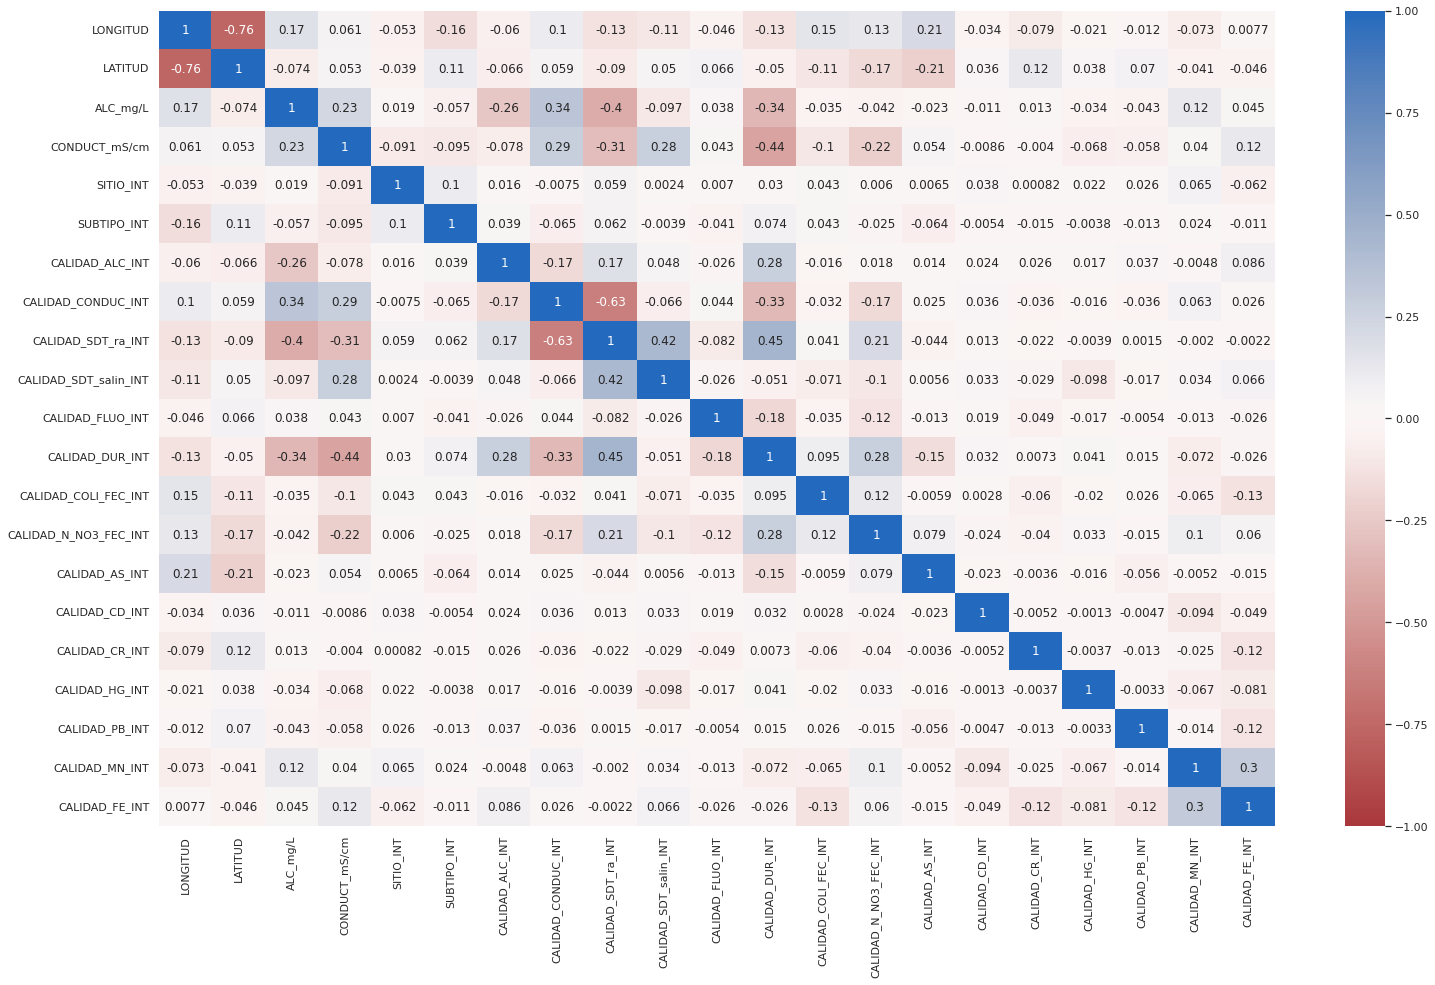

In [ ]:
sns.set(rc = {'figure.figsize':(25,15)}) 
sns.heatmap(df.corr(), annot = True, cmap = 'vlag_r', vmin = -1, vmax = 1)
plt.show()

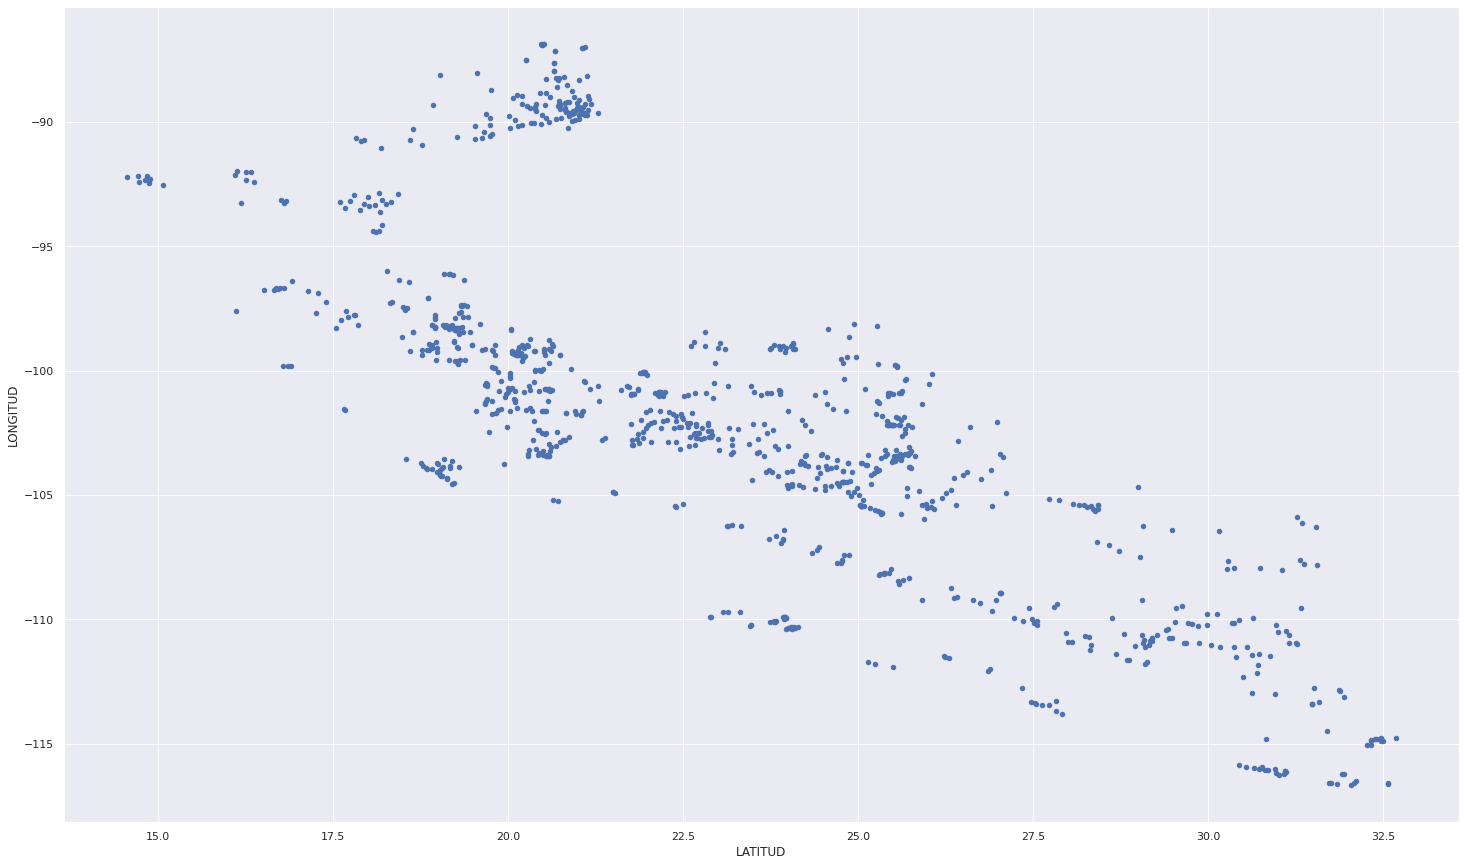

In [ ]:
df[['LATITUD', 'LONGITUD']].plot.scatter( "LATITUD","LONGITUD")

In [ ]:
df["Coordenadas"] = list(zip(df.LONGITUD, df.LATITUD))
df["Coordenadas"] = df["Coordenadas"].apply(Point)
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CALIDAD_COLI_FEC_INT,CALIDAD_N_NO3_FEC_INT,CALIDAD_AS_INT,CALIDAD_CD_INT,CALIDAD_CR_INT,CALIDAD_HG_INT,CALIDAD_PB_INT,CALIDAD_MN_INT,CALIDAD_FE_INT,Coordenadas
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,4,2,0,1,1,1,1,0,0,POINT (-102.0221 22.20887)
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,4,1,0,1,1,1,1,0,0,POINT (-102.20075 21.99958)
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,4,2,1,1,1,1,1,0,0,POINT (-102.28801 22.36685)
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,4,2,0,1,1,1,1,0,0,POINT (-102.29449 22.18435)
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,0,0,2,1,1,1,1,0,0,POINT (-110.2448 23.45138)


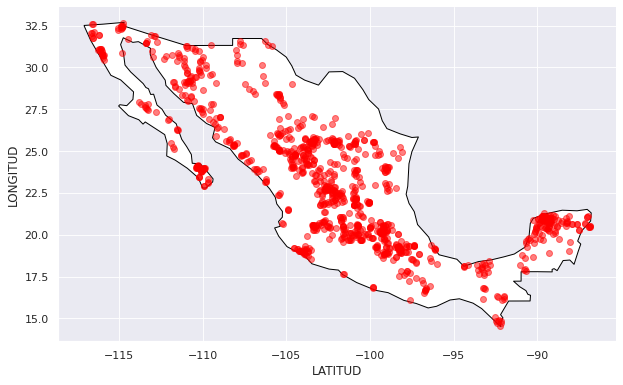

In [ ]:
puntos_en_mapa = gpd.GeoDataFrame(df, geometry="Coordenadas")

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

puntos_en_mapa.plot(ax=gax, color='red', alpha = 0.5)
#puntos_en_mapa

##**Kmeans**

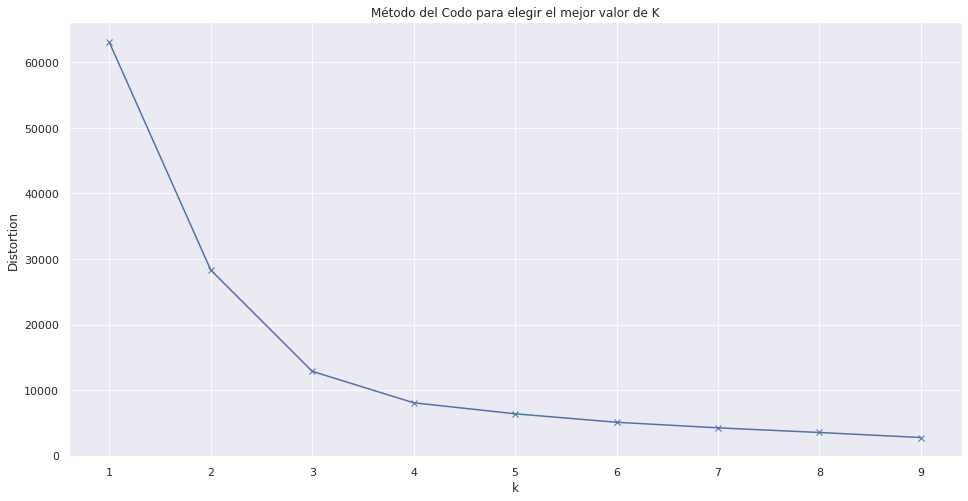

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df[['LONGITUD',	'LATITUD']])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Método del Codo para elegir el mejor valor de K')
plt.show()

In [ ]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(df[['LONGITUD',	'LATITUD']])
df['k_means']=kmeanModel.predict(df[['LONGITUD', 'LATITUD']]).astype(str)
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,ALC_mg/L,...,CALIDAD_N_NO3_FEC_INT,CALIDAD_AS_INT,CALIDAD_CD_INT,CALIDAD_CR_INT,CALIDAD_HG_INT,CALIDAD_PB_INT,CALIDAD_MN_INT,CALIDAD_FE_INT,Coordenadas,k_means
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,229.990,...,2,0,1,1,1,1,0,0,POINT (-102.02210 22.20887),3
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,231.990,...,1,0,1,1,1,1,0,0,POINT (-102.20075 21.99958),3
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,204.920,...,2,1,1,1,1,1,0,0,POINT (-102.28801 22.36685),0
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,327.000,...,2,0,1,1,1,1,0,0,POINT (-102.29449 22.18435),0
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,309.885,...,0,2,1,1,1,1,0,0,POINT (-110.24480 23.45138),2


In [ ]:
fig = px.scatter_geo(df, lon = 'LONGITUD', lat = 'LATITUD', color = 'k_means')
fig.update_geos(
    visible=False, resolution=110, #scope="north america",
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Black",
    fitbounds="locations"
)

fig.show()

In [ ]:
df.k_means.value_counts()

3    361
0    321
2    210
1    162
Name: k_means, dtype: int64

In [ ]:
centroids = kmeanModel.cluster_centers_
centroids = pd.DataFrame(centroids, columns = ['LONGITUD', 'LATITUD']).reset_index().rename(columns = {'index':'cluster'})
centroids['cluster'] = centroids.cluster.astype(str)
centroids

,cluster,LONGITUD,LATITUD
0,0,-103.447389,24.664864
1,1,-90.092716,19.650263
2,2,-111.262801,28.609425
3,3,-100.179832,20.169847


In [ ]:
fig = go.Figure()
for k in sorted(df.k_means.unique()):
  fig.add_trace(go.Scattergeo(
        lon = df[df.k_means == k].LONGITUD,
        lat = df[df.k_means == k].LATITUD,
        mode = 'markers',
        name = f'Cluster {k}' ,
        ))
fig.add_trace(go.Scattergeo(
        lon = centroids.LONGITUD,
        lat = centroids.LATITUD,
        mode = 'markers',
        name = 'Centroides',
        marker_color = 'Black',
        marker_size = 10
        ))
fig.update_geos(
    visible=False, resolution=110,
    showcountries=True, countrycolor="Black",
    showsubunits=True, subunitcolor="Black",
    fitbounds="locations")
fig.show()

In [ ]:
for col in [i for i in df.columns if 'CALIDAD' in i][:15]:
  print(pd.DataFrame(df.groupby([col]).k_means.value_counts()).rename(columns = {'k_means':'Freq'}))
  print('\n')

                              Freq
CALIDAD_ALC          k_means      
Alta                 0         256
                     3         240
                     2         158
                     1         136
Baja                 3          10
                     0           6
                     1           4
                     2           3
Indeseable como FAAP 3          30
                     0          14
                     1           7
                     2           6
Media                3          81
                     0          45
                     2          43
                     1          15


                               Freq
CALIDAD_CONDUC        k_means      
Buena para riego      3         172
                      0         162
                      2          72
                      1          23
Dudosa para riego     0          23
                      1          23
                      2          14
                      3          12
Excelent

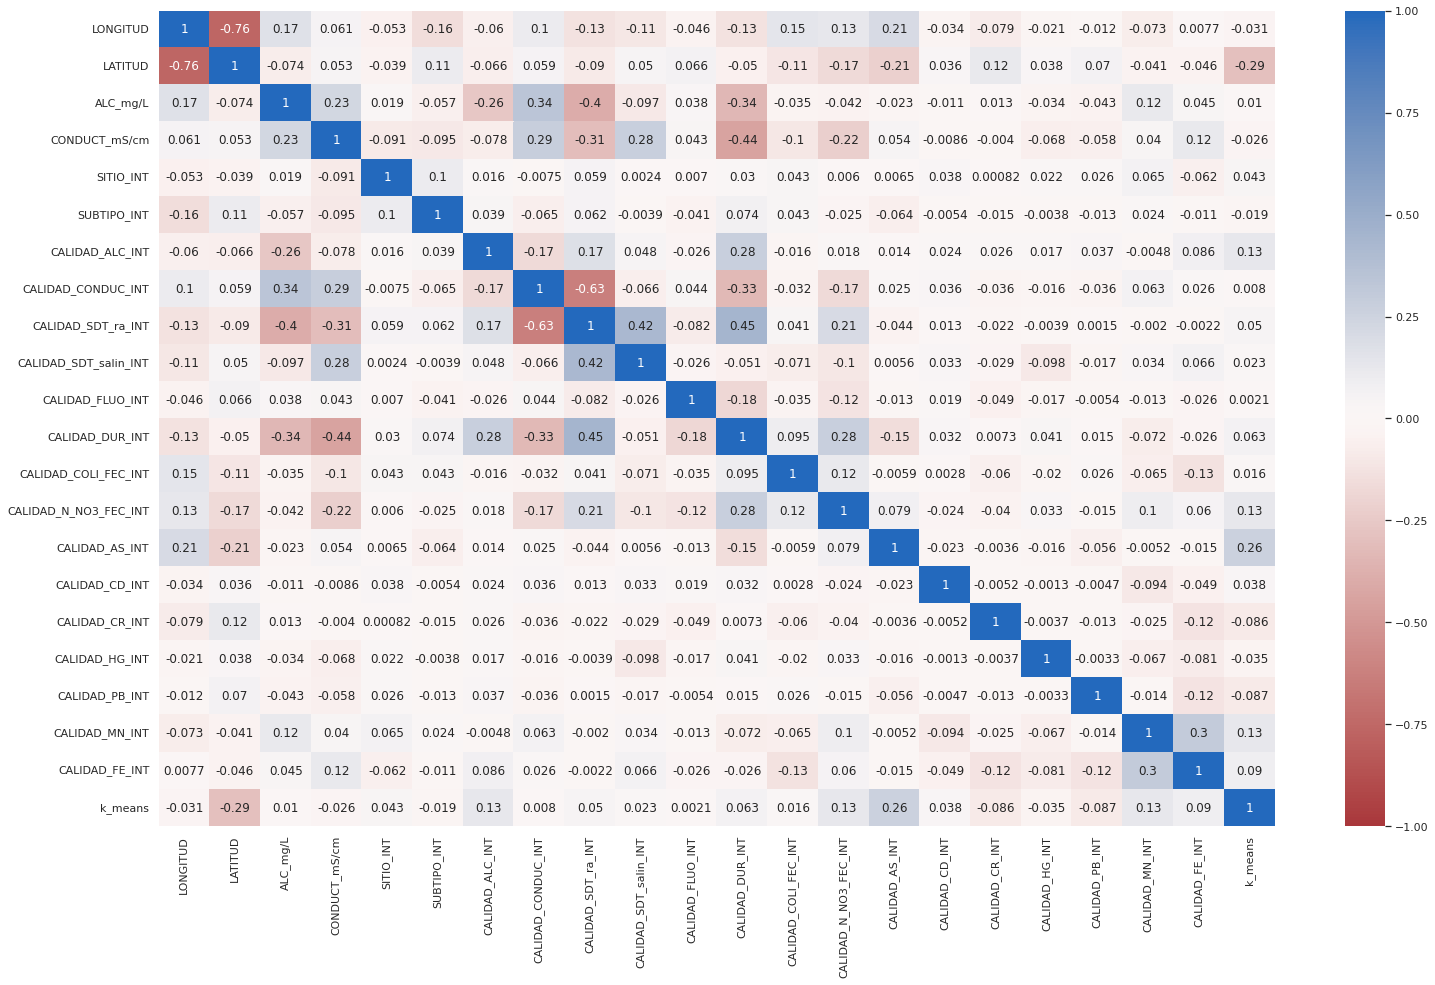

In [ ]:
df['k_means'] = df['k_means'].astype(int)
sns.set(rc = {'figure.figsize':(25,15)}) 
sns.heatmap(df.corr(), annot = True, cmap = 'vlag_r', vmin = -1, vmax = 1)
plt.show()

## **Conlusiones**

Del conjunto de nuestros datos quitamos las que tienen más datos perdidos o nulos como CONTAMINANTES', 'SDT_mg/L', asi también quitamos el 'PERIODO porque no nos interesa. En el caso de las demás variables identificamos los datos perdidos de las variables, luego imputamos las variables de tipo categorica con la moda, gráficamos el histograma con  box-plot de las variables ALC_mg/L' y CONDUCT_mS/cm, en el primer caso tenemos que se comporta de manera normal aunque tiene outliers, en el segundo presenta sesgo y además tiene más outliers. Generamos una matriz de correlación para ver la importancia de las variables y gráficamos los puntos para ubicarlos en un mapa. 

A través de elbow obtuvimos el número de cluster "k" a analizar, el resultado nos dió 4 y esos son los que usamos para aplicar Kmeans. 

La cantidad de puntos de cada cluster es la siguiente:
1    361
2    321
0    210
3    162

Usuamos kmeans para datos no supervisados, es decir, sin etiquetas, estos se clasifican de acuerdo a la estructura interna de los datos, que en este caso son las latitudes y longitudes del conjunto de datos. Cada uno de esos cluster contiene el número de puntos que de alguna manera tiene una distancia umbral. 

Finalmente, obtuvimos la frecuencia de cada una de las variables categoricas con respecto al cada cluster y observamos que  la CALIDAD_ALC en los cluster con más densidad de población es muy baja. 

## **Segunda Parte: Modelo de Clasificación de Arboles de Decisiones**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , make_scorer
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RepeatedStratifiedKFold


In [ ]:
#Seleccionamos las variables independientes y nuestra variable de salida que será el semaforo. 
X=df.loc[:,["CALIDAD_ALC_INT", "CALIDAD_CONDUC_INT", "CALIDAD_SDT_ra_INT", "CALIDAD_SDT_salin_INT", "CALIDAD_FLUO_INT", "CALIDAD_DUR_INT", "CALIDAD_COLI_FEC_INT", "CALIDAD_N_NO3_FEC_INT", "CALIDAD_AS_INT", "CALIDAD_CD_INT", "CALIDAD_CR_INT", "CALIDAD_HG_INT", "CALIDAD_PB_INT", "CALIDAD_MN_INT", "CALIDAD_FE_INT"]]
y=df["SEMAFORO"]


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.85)

Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 681 to 92
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   CALIDAD_ALC_INT        895 non-null    int8 
 1   CALIDAD_CONDUC_INT     895 non-null    int8 
 2   CALIDAD_SDT_ra_INT     895 non-null    int8 
 3   CALIDAD_SDT_salin_INT  895 non-null    int8 
 4   CALIDAD_FLUO_INT       895 non-null    int8 
 5   CALIDAD_DUR_INT        895 non-null    int8 
 6   CALIDAD_COLI_FEC_INT   895 non-null    int8 
 7   CALIDAD_N_NO3_FEC_INT  895 non-null    int8 
 8   CALIDAD_AS_INT         895 non-null    int8 
 9   CALIDAD_CD_INT         895 non-null    int8 
 10  CALIDAD_CR_INT         895 non-null    int8 
 11  CALIDAD_HG_INT         895 non-null    int8 
 12  CALIDAD_PB_INT         895 non-null    int8 
 13  CALIDAD_MN_INT         895 non-null    int8 
 14  CALIDAD_FE_INT         895 non-null    int8 
dtypes: int8(15)
memory usage: 20.1 KB


In [ ]:
# Aplicamos label encoding a nuestra variable de salida

le = LabelEncoder()
y_label = le.fit_transform(["Amarillo", "Rojo", "Verde"])

le.classes_



array(['Amarillo', 'Rojo', 'Verde'], dtype='<U8')

Feature: 0, Score: 0.00959
Feature: 1, Score: 0.08275
Feature: 2, Score: 0.01185
Feature: 3, Score: 0.11537
Feature: 4, Score: 0.14186
Feature: 5, Score: 0.02330
Feature: 6, Score: 0.07564
Feature: 7, Score: 0.01610
Feature: 8, Score: 0.00391
Feature: 9, Score: 0.14442
Feature: 10, Score: 0.01423
Feature: 11, Score: 0.11947
Feature: 12, Score: 0.16709
Feature: 13, Score: 0.04408
Feature: 14, Score: 0.03034


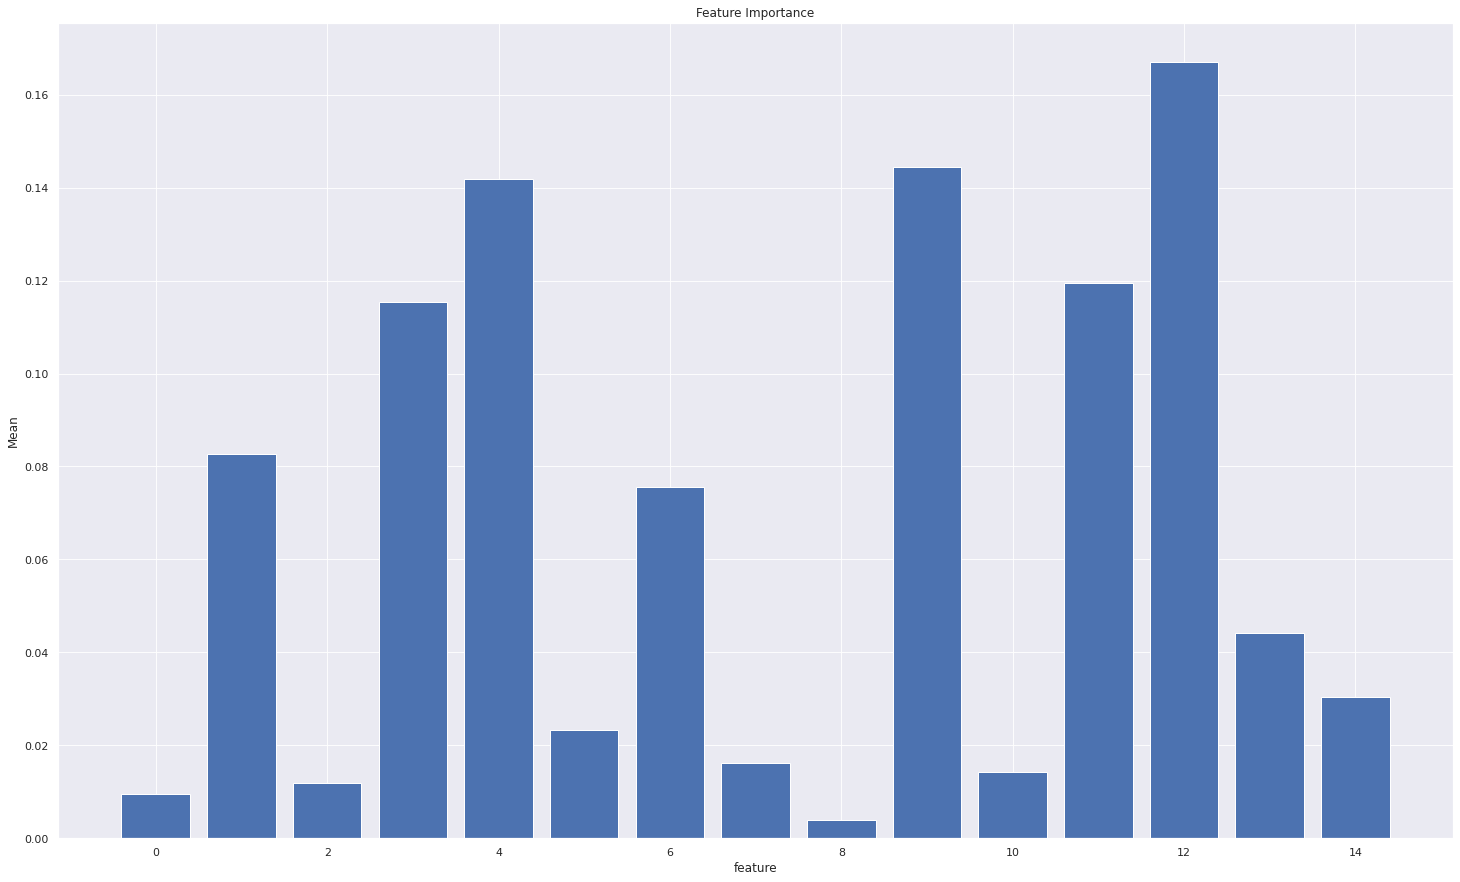

In [ ]:
# Realizamos el análisis de los feature importance con desición tree

# define dataset
X, y = make_classification(n_samples=1054, n_features=15, n_classes=3, n_informative=5, n_redundant=5, random_state=1 )
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
features= Xtest.columns
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel("feature")
pyplot.ylabel("Mean")
pyplot.title("Feature Importance")
pyplot.show()


In [ ]:
#Elegimos las variables de mayor importancia

#Las variables que elegimos son 1, 3, 4, 6, 9, 11, y 12

Modelo DecisionTree

In [ ]:
X, y = make_classification(n_samples=1054, n_features=15, n_classes=3, n_informative=5, n_redundant=5, random_state=1 )
model = DecisionTreeClassifier()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [ ]:
#precisión = classification_report(ytest, ypred, np.array(labels=[1,2,3]))
print("Accuracy:",metrics.accuracy_score(ytest, ypred))



Accuracy: 0.9811320754716981


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



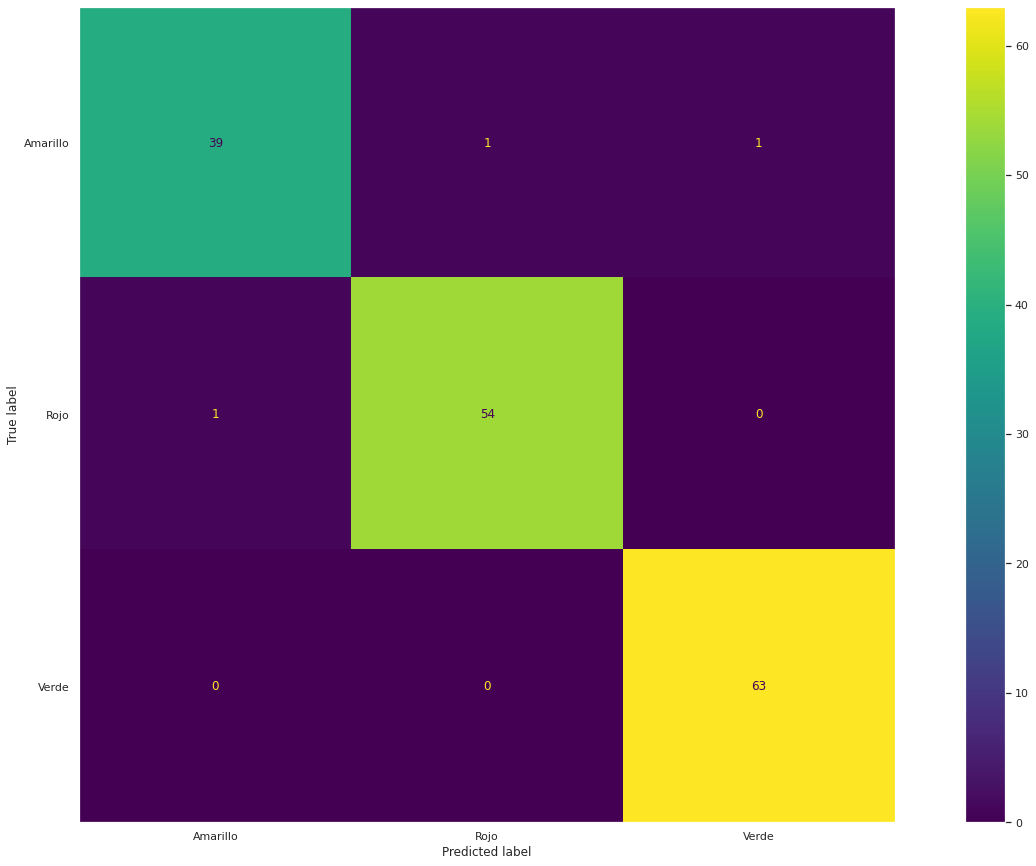

In [ ]:
# Mostramos los resultados del modelo mediante la matriz de confusión
model.fit(Xtrain,ytrain)
plot_confusion_matrix(model,Xtest,ytest)
plt.grid(False)
plt.show()

Modelo Random Forest



In [ ]:
clf=RandomForestClassifier(n_estimators=100)

clf.fit(Xtrain,ytrain)

ypredr=clf.predict(Xtest)

In [ ]:
clf.feature_importances_


array([0.0351678 , 0.04011869, 0.03648041, 0.03302584, 0.23141322,
       0.14759904, 0.09736697, 0.09774617, 0.10382985, 0.00358206,
       0.02009441, 0.00080542, 0.01295371, 0.06621142, 0.07360498])

Feature: 0, Score: 0.03517
Feature: 1, Score: 0.04012
Feature: 2, Score: 0.03648
Feature: 3, Score: 0.03303
Feature: 4, Score: 0.23141
Feature: 5, Score: 0.14760
Feature: 6, Score: 0.09737
Feature: 7, Score: 0.09775
Feature: 8, Score: 0.10383
Feature: 9, Score: 0.00358
Feature: 10, Score: 0.02009
Feature: 11, Score: 0.00081
Feature: 12, Score: 0.01295
Feature: 13, Score: 0.06621
Feature: 14, Score: 0.07360


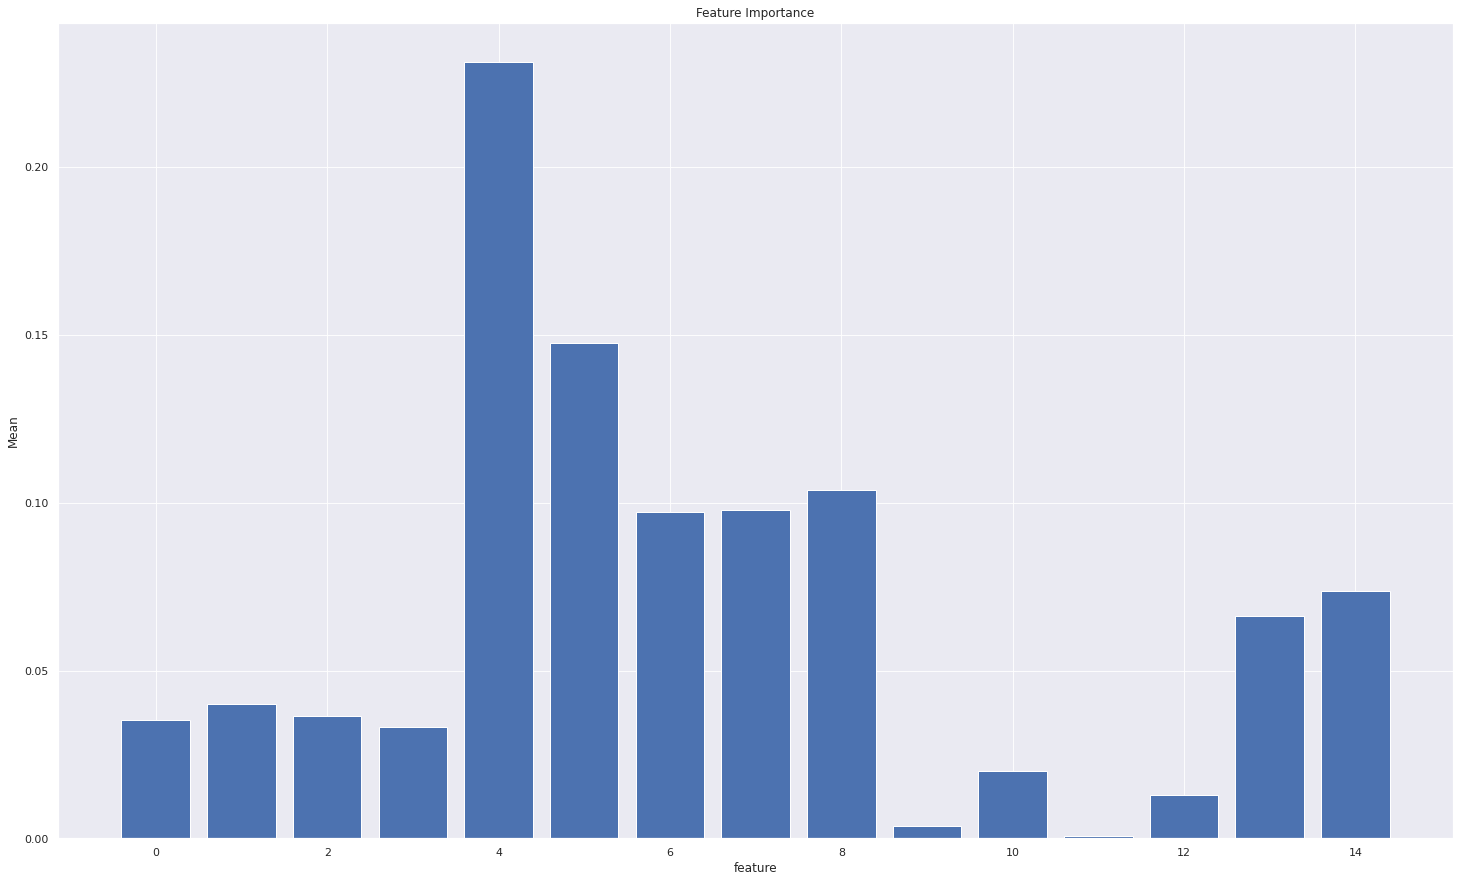

In [ ]:
importance = clf.feature_importances_
# summarize feature importance
features= Xtest.columns
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xlabel("feature")
pyplot.ylabel("Mean")
pyplot.title("Feature Importance")
pyplot.show()

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(ytest, ypredr))

Accuracy: 0.9433962264150944


Comparamos los modelos y optenemos el óptimo

In [ ]:
def obtener_modelos():

  modelos = list()
  nombres = list()
  
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')

  modelos.append(RandomForestClassifier())
  nombres.append('RF')

  return modelos, nombres


In [ ]:
def accuracy(ytrain, ypred):
  tn, fp, fn, tp = confusion_matrix(ytrain, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
modelos, nombres = obtener_modelos()

resultados = list()

In [ ]:
for i in range(len(modelos)):

  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
  #Creamos nuestro pipeline con los pasos de transformación y ejecución de los modelos
  pipeline = Pipeline(steps=[("ct", Columnas_Transformar), ("m", modelos[i])])

  #Almacenamos las métricas a utilizar en la lista 'mismetricas' y llamamos las funciones de métricas creadas previamente
  mismetricas = {
      "accuracy": make_scorer(accuracy)}
      

NameError: ignored